In [79]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

%matplotlib inline

In [40]:
img = cv2.imread('trainingSet/A/f0005_03.png', 0)

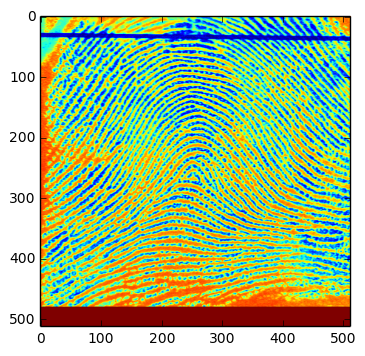

[[124 117 111 ..., 208 206 208]
 [119 113 110 ..., 204 205 207]
 [129 126 120 ..., 204 206 206]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


In [42]:
plt.imshow(img)
plt.show()
print(img)

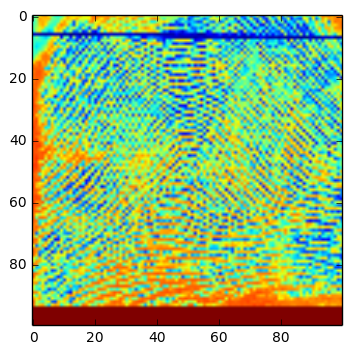

In [36]:
#img2 = cv2.Canny(img, 100, 200)
img2 = cv2.resize(img, (100, 100))
plt.imshow(img2)

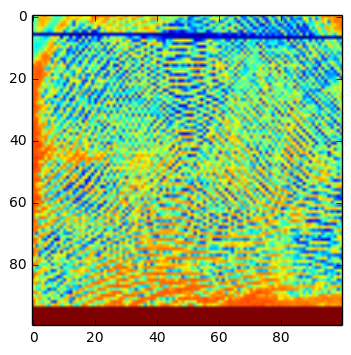

In [62]:
types = ['A', 'L', 'R', 'T', 'W']
X_raw = []
y_raw = []
for i, t in enumerate(types):
    pics = os.listdir('trainingSet/{0}'.format(t))
    for name in pics:
        #print('trainingSet/{0}/{1}'.format(t, name))
        img = cv2.imread('trainingSet/{0}/{1}'.format(t, name),0)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            img = img / 255.0
            X_raw.append(img)
            y_raw.append(i)
            #print(i)
    
plt.imshow(X_raw[0])

In [74]:
y_onehot = np.array(pd.get_dummies(y_raw))
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_onehot, test_size=0.2, random_state=0)

In [ ]:
pickle.dump({
    'X_train' : X_train,
    'X_test' : X_test,
    'y_train' : y_train,
    'y_test' : y_test   
}, open( "data.pickle", "w" ) )

In [85]:
print(X_train[5].shape)

(100, 100)


In [92]:
test = pickle.load(open('./data.pickle', 'rb'))